<a href="https://colab.research.google.com/github/nemanovich/LLM-essentials/blob/main/week2_pratice_session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this week's practice session we'll learn:

- How to use LangChain, one of the most popular library to simplify LLM interaction;
- How to add plugins to an LLM with LangChain;
- How to interact with a database using an LLM.

# LangChain

LangChain is a handy library which supplies a whole infrastucture around LLMs (both open source and available by API) allowing to quickly establish LLM-powered services. It can help you with many LLM related tasks, from prompt optimisation to creating multi-call LLM agents.

Let's see how to use LangChain. First of all, download the library:

In [ ]:
import os
from google.colab import userdata

# os.environ['OPENAI_API_KEY'] = open(".open-ai-api-key")
os.environ['OPENAI_API_KEY'] = userdata.get("open_ai_api_key")

In [ ]:
!pip install openai langchain langchain_openai -q

The easiest thing you can do with LangChain is just calling an LLM.  We'll do it for OpenAI API:

Note: The base model for OpenAI class is `text-davinci-003`, the significance of that will become apparent later

In [ ]:
from langchain_openai import OpenAI

llm = OpenAI()

In [ ]:
print(llm.invoke(
    "What is the difference between cats and dogs? In two words:"
))

 personality and behavior.

Cats and dogs are two of the most popular pets in the world, but they have distinct differences in their personalities and behavior. Here are some key differences between cats and dogs:

1. Personality and Independence

Cats are known for their independent nature and can often be seen lounging around and doing their own thing. They are less likely to seek attention and affection from their owners and are content with their own company. On the other hand, dogs are social animals and crave attention and affection from their owners. They are loyal, loving, and thrive on human interaction.

2. Trainability and Obedience

Dogs are highly trainable and obedient animals. They are eager to please their owners and can be trained to perform a variety of tasks and commands. Cats, on the other hand, are less trainable and often do not respond well to obedience training. They are more independent and tend to do things on their own terms.

3. Energy Levels

Dogs are known

As you can see, the interface is already much simpler, compared to writing it on your own.

LangChain also distinguishes between LLM's and Chat models.

A difference is very subtle and mostly affect the format in which you pass data. LLM's are a pure text completion models, which means they input text and output text. Where is ChatModels work on a list of ChatMessages, which can be AIMessage, HumanMessage or SystemMessage (this difference we covered in week 1) and return an AIMessage.

Newer OpenAI only implement chat interface, for example gpt-3.5-turbo, gpt-4, etc. This means, that you cannot use them as an LLM.

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.schema import (
    AIMessage,
    HumanMessage,
    SystemMessage
)

chat = ChatOpenAI(name='gpt-4o-mini')
chat.invoke([
    HumanMessage(content="In two words what's the difference "\
        "between Cats and Dogs?")
])

AIMessage(content='Independence vs Loyalty', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 5, 'prompt_tokens': 19, 'total_tokens': 24}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-1c58a446-f292-446f-b4dc-2908813794ef-0', usage_metadata={'input_tokens': 19, 'output_tokens': 5, 'total_tokens': 24})

Note: Draw your attention to the fact that we received a `AIMessage` instead of a string

### Basics

#### Prompt templates

A useful feature of LangChain is Prompt templates.

If you need to use the same prompt structure with different parameters, prompt templates can save you from the text duplication. See, for example:

In [ ]:
from langchain.prompts import PromptTemplate

prompt = PromptTemplate.from_template(
    "What is the national cousine of {country}?"
)
prompt.format(country="Australia")

'What is the national cousine of Australia?'

Now our imaginary user needs only to select a country instead of creating a whole prompt.

#### Chaining

One of the main pillars of LangChain is the concept of chaining, that is of combining several LLM calls, external function calls, etc.

Much like you combine layers in neural networks, but here we have a much more diverse set of tools.

A very basic chain consists of prompt template and an LLM call. It's almost like a "function" for an LLM:

In [ ]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()

chain = prompt | llm | output_parser
chain.invoke("Australia")

'\n\nThe national cuisine of Australia is often considered to be a fusion of British, Mediterranean, and Indigenous Australian influences. It includes dishes such as meat pies, fish and chips, roast lamb, and seafood. Other popular dishes include Vegemite on toast, pavlova, and Anzac biscuits. Australia is also known for its barbecue culture and love of fresh produce and seafood.'

`StrOutputParser` here transforms output of our LLM, which in this case is in `messages`, in the format of a string. In case you'd ask for multiple output options, this parser give you the most likely one.

Note by the way that, although we had a typo in the prompt template ("cousine" instead of "cuisine"), LLM managed to mitigate with it. You probably shouldn't rely on this too much, but generally LLMs, that are trained on data containing typos as well, can be able to cope with some amount of mistakes in the prompts.

In [ ]:
text_model_response = llm.invoke("Hello, do you like cats?")
print(text_model_response)
print(f"Type: {type(text_model_response)}")

chat_response = chat.invoke("Hello, do you like cats?")
print(chat_response)
print(f"Type: {type(chat_response)}")


parsed_text_model_output = output_parser.invoke(text_model_response)
print(parsed_text_model_output)
print(type(parsed_text_model_output))

parsed_chat_output = output_parser.invoke(chat_response)
print(parsed_chat_output)
print(type(parsed_chat_output))



I am an AI and do not have the ability to like or dislike things like a human does. I am neutral towards cats.
Type: <class 'str'>
content="As a language model AI, I don't have personal preferences or feelings, so I don't have the ability to like or dislike anything. But cats are popular pets and are loved by many people for their playful and independent nature." additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 14, 'total_tokens': 60}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-4b0d29e0-3193-4c0f-b92f-93cbd12a2211-0' usage_metadata={'input_tokens': 14, 'output_tokens': 46, 'total_tokens': 60}
Type: <class 'langchain_core.messages.ai.AIMessage'>


I am an AI and do not have the ability to like or dislike things like a human does. I am neutral towards cats.
<class 'str'>
As a language model AI, I don't have personal preferences or feelings, so I don't 

#### Sequential chain

We can combine multiple calls in a simple sequential chain, where the output of one call become the input of another call.

In [ ]:
first_prompt = PromptTemplate.from_template(
    "What is the capital of {country}?"
)
first_chain = first_prompt | llm | output_parser

second_prompt = PromptTemplate.from_template(
    "{city} is the capital of which country?"
)
second_chain = second_prompt | llm | output_parser

simple_sequential_chain = first_chain | second_chain

Intuitively now we should receive the same thing we inputted, let's try.

In [ ]:
simple_sequential_chain.invoke("United Kingdom")

'\n\nThe capital of United Kingdom is London.'

If you want to make a more complicated chain, where outputs fill in specific variables, we'll have to use an `itemgetter`.

In [ ]:
from operator import itemgetter


first_prompt = PromptTemplate.from_template(
    "Name a city of {country} starting with {letter}",
)
first_chain = first_prompt | llm | output_parser

second_prompt = PromptTemplate.from_template(
    "What is the main attraction in {city}?"
)
second_chain = second_prompt | llm | output_parser

sequential_chain = {
    "country": itemgetter("country"),
    "letter": itemgetter("letter"),
    "city": first_chain
} | second_chain | output_parser


In that case you'll have to pass input arguments as a dict.

In [ ]:
sequential_chain.invoke({"country": "France", "letter": "P"})

'\n\nThe main attraction in Paris is the Eiffel Tower.'

#### Debugging

As you can see we only get the output of the last chain. But what if we want to see what happened in the first one?

In [ ]:
from langchain.callbacks.tracers import ConsoleCallbackHandler


In [ ]:
sequential_chain.invoke(
    {"country": "France", "letter": "P"},
    config={'callbacks': [ConsoleCallbackHandler()]}
)

[chain/start] [chain:RunnableSequence] Entering Chain run with input:
{
  "country": "France",
  "letter": "P"
}
[chain/start] [chain:RunnableSequence > chain:RunnableParallel<country,letter,city>] Entering Chain run with input:
{
  "country": "France",
  "letter": "P"
}
[chain/start] [chain:RunnableSequence > chain:RunnableParallel<country,letter,city> > chain:RunnableLambda] Entering Chain run with input:
{
  "country": "France",
  "letter": "P"
}
[chain/end] [chain:RunnableSequence > chain:RunnableParallel<country,letter,city> > chain:RunnableLambda] s] Exiting Chain run with output:
{
  "output": "France"
}
[chain/start] [chain:RunnableSequence > chain:RunnableParallel<country,letter,city> > chain:RunnableLambda] Entering Chain run with input:
{
  "country": "France",
  "letter": "P"
}
[chain/end] [chain:RunnableSequence > chain:RunnableParallel<country,letter,city> > chain:RunnableLambda] s] Exiting Chain run with output:
{
  "output": "P"
}
[chain/start] [chain:RunnableSequence >

'\n\nThere are several popular attractions in Paris, but the most iconic and famous is the Eiffel Tower. Other popular attractions include the Louvre Museum, Notre-Dame Cathedral, Arc de Triomphe, and the Champs-Élysées.'

### Task 1

In this task we'll learn how to rewrite ChatGPT interaction code to LangChain.

In the previous week we inplemented translate and summarise function. Rewrite it using `SequentialChain`

In [ ]:
from langchain_openai import OpenAI
from langchain.chains import SequentialChain
from langchain_core.output_parsers import StrOutputParser

from operator import itemgetter

llm = OpenAI()
output_parser = StrOutputParser()

summarise_prompt = PromptTemplate(
    input_variables=['text'],
    template="Write a short summary of the following text.\n{text}"
)
summarise_chain = summarise_prompt | llm | output_parser

translate_prompt = PromptTemplate(
    input_variables=['summary', 'target_language'],
    template="Translate the following text to {target_language}:\n{summary}"
)
translate_chain = translate_prompt | llm | output_parser

summarise_and_translate_chain = {
    "text": itemgetter("text"),
    "summary": summarise_chain,
    "target_language": itemgetter("target_language")
} | translate_chain | output_parser

In [ ]:
article = open("wikipedia_article_japanese.txt").read()

summarise_and_translate_chain.invoke(
    {'text': article, "target_language": "English"}
)

'によっても異なる。\n\n\nIn addition, products featuring paw pads are also commonly seen in adult goods.\n\nPaw pads are also used as trademarks for hanko (name stamps) and stamps (refer to Nekkiu).\n\nPaw pads are the raised and hairless part of the bottom of the feet of animals in the order Carnivora, and are officially called metatarsal pads. The paw pads have sections such as the palmar pad, digital pads, carpal pads, plantar pads, and toe pads, and they mainly serve to cushion the impact during walking. They can be found in animals such as cats, dogs, bears, weasels, rodents, and marsupials. The shape and softness of paw pads vary among individuals and can also differ depending on the environment they inhabit. '

## LangChain Agents and Memory

In this part we'll explore two cool features of LangChain: **Agents** and **Memory**. You will learn how to:

- access internet inside a chain;
- remember the conversation history and adjust to it.

**Agents** allow you to use tooling like web search, calling apis, math, python code etc. (they are known as "Plugins" in ChatBPT Web UI) to achive the goal of the given task.

**Memory** allows you to keep a state of the conversation, just like what you see in the WebUI of ChatGPT.

If you combine the two you can essentially get the same interface as ChatGPT WebUI has with plugins.

### Web search

The are plenty of search engines available. We'll try DuckDuckGo, but feel free to use any other for your projects.

Let's install the library.

In [ ]:
!pip install duckduckgo_search langchain_community -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.8 MB/s eta 0:00:00


A search engine is a **tool**. Which is essentially a function with specific signature, that our LLM can use.

In [ ]:
from IPython.display import display
from langchain_community.tools import DuckDuckGoSearchRun, DuckDuckGoSearchResults

results_tool = DuckDuckGoSearchResults()
display(results_tool("What is the name of the cat from Shrek"))

search_tool = DuckDuckGoSearchRun()
display(search_tool("What is the name of the cat from Shrek"))

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use invoke instead.
  warn_deprecated(


"[snippet: Our beloved protagonists off the page, from the comedic genius of Mike Myers to the zestful Eddie Murphy, the spirited Cameron Diaz, and the regally villainous John Lithgow, lifted 'Shrek' from mere pixels to a cultural milestone. In the heart of 'Shrek's' colossal appeal lies its eclectic mix of misfit characters—a testament to the ..., title: List Of All Shrek Characters - Characters Database, link: https://charactersdb.com/list-all-shrek-characters/], [snippet: The first name on this list of Shrek characters is the man, or ogre, himself: Shrek. Shrek is the titular character of the franchise. ... Puss in Boots, or simply Puss, is an orange tabby cat. He carries a silver sword and wears a black cavalier hat, black boots, and a black belt. Spanish actor Antonio Banderas voiced Puss in the films ..., title: List of 35 Iconic Shrek Characters - Facts.net, link: https://facts.net/shrek-characters/], [snippet: Puss in Boots is a beloved character from the Shrek franchise that h

"Explore the entire ensemble of 'Shrek' characters from the beloved 2001 Dreamworks classic. Enter the whimsical world of the ogre Shrek and his friends. Shrek characters are some of the most iconic characters in animation film history. Loved for their uniqueness, they appear in several films and spin-offs of the long-standing franchise starring the popular ogre. 23 Facts About Puss In Boots (Shrek) Puss in Boots is a beloved character from the Shrek franchise that has captured the hearts of both children and adults alike. With his charming demeanor, iconic cat-like features, and witty one-liners, Puss in Boots has become one of the most memorable cartoon characters of all time. Originally introduced in ... Shrek is a 2001 American animated fantasy comedy film loosely based on the 1990 children's picture book of the same name by William Steig. Directed by Andrew Adamson and Vicky Jenson (in their feature directorial debuts) and written by Ted Elliott, Terry Rossio, Joe Stillman, and Ro

Creating an agent, which uses this tool is pretty simple

In [ ]:
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(name='gpt-4o-mini')

agent = initialize_agent(
    tools=[search_tool], llm=llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 1.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  warn_deprecated(


Let's see it in action

In [ ]:
agent.invoke("What is the name of the cat from Shrek")



> Entering new AgentExecutor chain...
I need to find the name of the cat from Shrek
Action: duckduckgo_search
Action Input: "Shrek cat name"
Observation: Explore the entire ensemble of 'Shrek' characters from the beloved 2001 Dreamworks classic. Enter the whimsical world of the ogre Shrek and his friends. Shrek characters are some of the most iconic characters in animation film history. Loved for their uniqueness, they appear in several films and spin-offs of the long-standing franchise starring the popular ogre. Puss in Boots is a beloved character from the Shrek franchise that has captured the hearts of both children and adults alike. With his charming demeanor, iconic cat-like features, and witty one-liners, Puss in Boots has become one of the most memorable cartoon characters of all time. Originally introduced in Shrek 2, this swashbuckling feline quickly became a fan favorite, leading to the ... The cat in Shrek is called Puss in Boots, voiced by Antonio Banderas. He is a swashb

{'input': 'What is the name of the cat from Shrek', 'output': 'Puss in Boots'}

As you can see, agent not only chose to perform a web search, but also read the results and gave you the final answer.

You can read more about how ReAct agents work [here](https://react-lm.github.io/)

### Memory

Memory allows an agent to memorize the previous interaction with the user and act according to it. Let's try to add memory and make a small conversation.

We'll use the simplest construct called `ConversationBufferMemory` but you can actually use more complicated ones, which save conversation history to a database for example.

In [ ]:
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory(memory_key='chat_history', return_messages=True)
memory.chat_memory.add_user_message("Hello, ChatGPT! How's your day?")
memory.chat_memory.add_ai_message("I'm doing well, thanks for asking!")

memory.load_memory_variables({})

{'chat_history': [HumanMessage(content="Hello, ChatGPT! How's your day?"),
  AIMessage(content="I'm doing well, thanks for asking!")]}

Note:
- We used `memory_key` = 'chat_history', which is why memory returns us messages under that key
- We used `return_messages` = True, which is why memory returns messages to us instead of concatenated strings.

Chat history is explicitly present in the prompt as the `history` variable.

Now, let's define the chain:


With LangChain you can initialise an agent with memory still in just a couple lines.
You need to make sure to use an appropriate agent type (in this case the "CHAT_CONVERSATION" ReAct agent.

Note: Admittedly the documentation for this is a bit chaotic, so you'll have to play a bit before you get a good result.

In [ ]:
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain_openai import ChatOpenAI

memory = ConversationBufferMemory(memory_key='chat_history', return_messages=True)

llm = ChatOpenAI(name='gpt-4o-mini')

agent = initialize_agent(
    tools=[search_tool],
    memory=memory,
    llm=llm,
    agent=AgentType.CHAT_CONVERSATIONAL_REACT_DESCRIPTION ,
    verbose=True,
)

Let's to observe some memorization happening!

In [ ]:
agent.invoke("What is the name of the cat from Shrek?")



> Entering new AgentExecutor chain...
```json
{
    "action": "Final Answer",
    "action_input": "The name of the cat from Shrek is Puss in Boots."
}
```

> Finished chain.


{'input': 'What is the name of the cat from Shrek?',
 'chat_history': [HumanMessage(content='What is the name of the cat from Shrek?'),
  AIMessage(content='The name of the cat from Shrek is Puss in Boots.')],
 'output': 'The name of the cat from Shrek is Puss in Boots.'}

In [ ]:
agent.invoke("How many sequels were there in this film?")



> Entering new AgentExecutor chain...
```json
{
    "action": "Final Answer",
    "action_input": "There were three sequels in the Shrek film series: Shrek 2, Shrek the Third, and Shrek Forever After."
}
```

> Finished chain.


{'input': 'How many sequels were there in this film?',
 'chat_history': [HumanMessage(content='What is the name of the cat from Shrek?'),
  AIMessage(content='The name of the cat from Shrek is Puss in Boots.'),
  HumanMessage(content='How many sequels were there in this film?'),
  AIMessage(content='There were three sequels in the Shrek film series: Shrek 2, Shrek the Third, and Shrek Forever After.')],
 'output': 'There were three sequels in the Shrek film series: Shrek 2, Shrek the Third, and Shrek Forever After.'}

# Vector stores

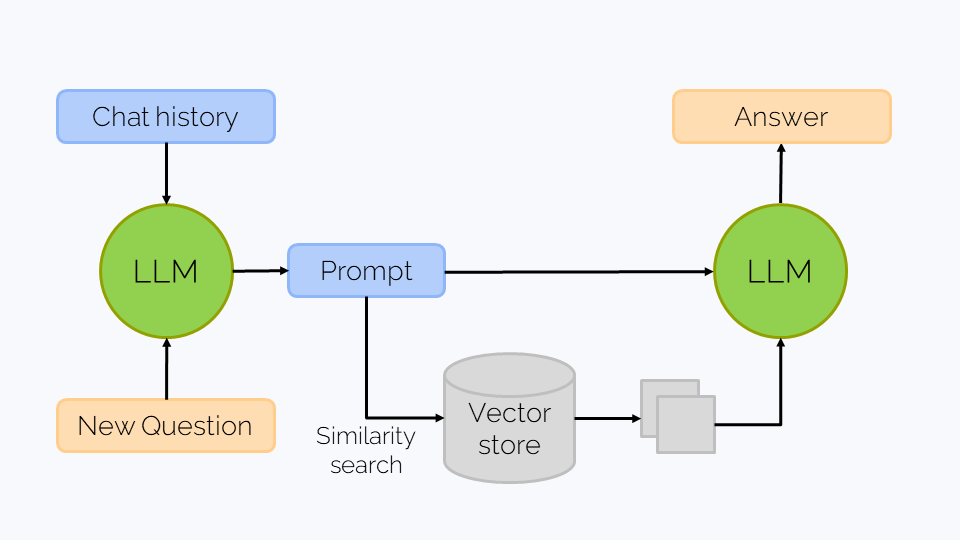

In [ ]:
from IPython.display import Image
Image("/content/langchain_vectorstore.png", width=600)

One of the goals of this week is to create your own RAG-based app. **RAG** (**R**etrieval **A**ugmented **G**eneration) is a concept of supporting a generative model with some kind of a retrieval tool which allows to get more faithful results and less hallucinations. This is crucial when we need to supply our users with facts, for example, if we're creating a navigation tool for a company's internal wiki.

Actually, we already touched upon RAG when we used DuckDuckGo. This time we'll retrieve data from a specific type of database - **vector store**.

The idea behind vector storages is to represent data items as **embeddings** (real vectors). When we receive a search query, we also somehow make it into an embedding and look for its nearest neighbors in the vector space which can be done rather quickly if somewhat approximately. If your embedding model produces vectors with strong semantic information embedded into it, you can have very high quality retrieval.

Vector storages emerged long before transformers, but, but because transformer models offer exceptional text understanding capabilities, using them to construct embeddings for vector storage systems is very popular. A typical AI-powered vector database query tool works like that:

- An LLM reformulates user's prompt into a vector store query;
- An embedding model is used to map the query into the database vector space;
- Vector store returns several items whose embeddings are nearest neighbors of the query's embedding;
- An LLM is used to process search results into a nice human readable output.

In this practice session you'll getting acquainted with vector databases, and in the homework you'll assemble all the pipeline using LangChain.


There are quite a few vector stores available. We will employ the system called [Faiss](https://github.com/facebookresearch/faiss). It is a state-of-the-art library made by Meta for creating vector databases, which is used by a lot of production solutions.

We will use an IELTS essay dataset as a source of long texts, we want to search through.

Please make sure to put your credentials in an appropriate location following the instruction here https://github.com/Kaggle/kaggle-api#api-credentials

In [ ]:
!pip install kaggle faiss-cpu tiktoken -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 28.4 MB/s eta 0:00:00


In [ ]:
!export KAGGLE_CONFIG_DIR="/content/" && kaggle datasets download mazlumi/ielts-writing-scored-essays-dataset

Dataset URL: https://www.kaggle.com/datasets/mazlumi/ielts-writing-scored-essays-dataset
License(s): other
  0% 0.00/674k [00:00<?, ?B/s]
100% 674k/674k [00:00<00:00, 31.7MB/s]


In [ ]:
!unzip ielts-writing-scored-essays-dataset.zip

Archive:  ielts-writing-scored-essays-dataset.zip
  inflating: ielts_writing_dataset.csv  


Let's look at the data:

In [ ]:
import pandas

In [ ]:
pandas.options.display.max_colwidth = 100
reviews = pandas.read_csv("ielts_writing_dataset.csv")
reviews.head(2).dropna(axis=1)

,Task_Type,Question,Essay,Overall
0,1,The bar chart below describes some changes about the percentage of people were born in Australia...,"Between 1995 and 2010, a study was conducted representing the percentages of people born in Aust...",5.5
1,2,"Rich countries often give money to poorer countries, but it does not solve poverty. Therefore, d...","Poverty represents a worldwide crisis. It is the ugliest epidemic in a region, which could infec...",6.5


## Text splitters

The length of the documents that we could store in a vector storage is limited by the context length of your models. The texts we work with are often longer, so we need **Text Splitters** to cut the texts into pieces.

First of all, let's check out how big our documents are:

In [ ]:
# no truncation of text
pandas.options.display.max_colwidth = 100_000_000

In [ ]:
import tiktoken
import re
enc = tiktoken.get_encoding("cl100k_base")

In [ ]:
rows_as_single_string = reviews.apply(
    lambda row: (re.sub(' +', ' ', row.to_string().replace("\n", " "))),
    axis=1
)
max(map(lambda text: len(enc.encode(text)), rows_as_single_string))

772

Even though this is less then 4096 max ChatGPT tokens, models typically don't undrestand long texts well enough, so it's better to split this item.

Let's create a document list for our database

In [ ]:
documents = rows_as_single_string.tolist()

Let's look at a simple splitter called `CharacterTextSplitter`. It splits text on `separator` then gathers chunks based on `chunk size` as measured by a `length_function`. `chunk_overlap` controlls how much of the previous chunk we want to include in the next one for continuity.

Let's see an example.

In [ ]:
from langchain.text_splitter import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    separator=" ",
    chunk_size=32,
    chunk_overlap=4,
    length_function=lambda text: len(enc.encode(text)),
)

In [ ]:
from IPython.display import display

texts = text_splitter.create_documents(documents)
display(texts[0])
display(texts[1])
display(texts[2])

Document(page_content='Task_Type 1 Question The bar chart below describes some changes about the percentage of people')

Document(page_content='of people were born in Australia and who were born outside Australia living in urban,')

Document(page_content='in urban, rural and town between 1995 and 2010.Summarise the information by')

`RecursiveCharacterTextSplitter` is very similar to `CharacterTextSplitter`, except for the splitting and gathering logic. It inputs a list of `separators` (the default is ["\n\n", "\n", " ", ""]), which it then used in the same order as in the list. That means that first we split paragraphs, then if they are bigger than `chunk_size` we split on sentences, and so on. This helps the chunks to be a bit more cohesive.

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=32,
    chunk_overlap=4,
    length_function=lambda text: len(enc.encode(text)),
    add_start_index=True,
)

In [ ]:
texts = text_splitter.create_documents(documents)
display(texts[0])
display(texts[1])
display(texts[2])

Document(metadata={'start_index': 0}, page_content='Task_Type 1 Question The bar chart below describes some changes about the percentage of people were born in Australia and who were born outside Australia living in urban, rural')

Document(metadata={'start_index': -1}, page_content='in urban, rural and town between 1995 and 2010.Summarise the information by selecting and reporting the main features and make comparisons where relevant.')

Document(metadata={'start_index': 288}, page_content='comparisons where relevant. Essay Between 1995 and 2010, a study was conducted representing the percentages of people born in Australia, versus people born outside')

Probably the most reasonable way to split is not by characters but by tokens using the model's tokenizer. LangChain supports creating a text splitter directly from tiktoken.

In [ ]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=32,
    chunk_overlap=4,
    add_start_index=True
)

In [ ]:
texts = text_splitter.create_documents(documents)
display(texts[0])
display(texts[1])
display(texts[2])

Document(metadata={'start_index': 0}, page_content='Task_Type 1 Question The bar chart below describes some changes about the percentage of people were born in Australia and who were born outside Australia living in urban, rural')

Document(metadata={'start_index': -1}, page_content='in urban, rural and town between 1995 and 2010.Summarise the information by selecting and reporting the main features and make comparisons where relevant. Essay Between')

Document(metadata={'start_index': 316}, page_content='Essay Between 1995 and 2010, a study was conducted representing the percentages of people born in Australia, versus people born outside Australia, living in urban, rural,')

## Vector database creation

Let's create a database of segments of IELTS essays and examinator comments.

In [ ]:
from langchain.docstore.document import Document
from langchain_openai import OpenAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS

# Load the document, split it into chunks, embed each chunk and load it into the vector store.
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=256,
    chunk_overlap=16,
    add_start_index=True
)
splitted_documents = text_splitter.create_documents(documents)
db = FAISS.from_documents(splitted_documents, OpenAIEmbeddings())

Now we can perform similarity search using our embeddings

In [ ]:
query = "An awesome essay about bar charts"
docs = db.similarity_search(query)
docs[0].page_content

"Task_Type 1 Question The bar charts below shows the number of visits to a community website in the first and second year of use.Summarize the information by selecting and reporting the main features and mae comparisons with relevant. Essay The bar chart illustrates the quantity of visits by the thousands paid to a community website within the first two years of use.\\nOverall, there is a greater upward trend from the second year of use compared to the first year of use. In addition to that, in both years the website undergoes a drastic fluctuation in numbers. It can be observed that initially in the month of September, number of visits in the first year of use are lower than second year of use, but numbers of the former subsequently surpasses the latter in the final month of August.\\nIn regards to the first year of use, quantity of visits increases from about 2000 visits in September to 10000 visits within 2 months and remains constant for another month. Following that, numbers plumm

In [ ]:
query = "A poorly written essay"
docs = db.similarity_search(query)
docs[0].page_content

'but you must offer more arguments regarding why you agree or disagree. There are many spelling, punctuation and article errors. The essay is easy to follow but has the appearance of the writer running short of time. Task_Response NaN Coherence_Cohesion NaN Lexical_Resource NaN Range_Accuracy NaN Overall 5.0'

# Specific OpenAI api capabilities

Since the creation of LangChain, OpenAI's api actually added a lot of creature comforts on it's own, so some of the funcitonality is being duplicated a bit now.


## Structured outputs

Modern LLMs support outputing in a specific format, for example we can use "JSON mode" to force outputs to be in JSON fromat.

In [ ]:
import os
from google.colab import userdata

# os.environ['OPENAI_API_KEY'] = open(".open-ai-api-key")
os.environ['OPENAI_API_KEY'] = userdata.get("open_ai_api_key")

from openai import OpenAI

client = OpenAI()

non_json_output = client.chat.completions.create(
    messages=[{'role': 'user', 'content': 'Design a role play character\'s name, class and a short description'}],
    model="gpt-4o-mini",
).choices[0].message.content
print(non_json_output)

json_output = client.chat.completions.create(
    messages=[{'role': 'user', 'content': 'Design a role play character\'s name, class and a short description in json format'}],
    model="gpt-4o-mini",
    response_format={"type": "json_object"}
).choices[0].message.content
print(json_output)

**Character Name:** Elowen Thistlebloom

**Class:** Feybinder

**Description:** Elowen is a mysterious Feybinder from the Enchanted Glade, where the veil between the mortal realm and the Feywild is thin. She has ethereal, luminescent green hair that cascades down her back like the vines in her enchanted forest home. Her skin shimmers like moonlight, and her deep emerald eyes reflect the secrets of the woods. Clad in flowing robes woven from petals and leaves, Elowen carries a staff adorned with crystals that pulse with magic.

A master of nature's whispers, Elowen communicates with the spirits of the forest and harnesses the power of the Fey to aid her allies or confound her enemies. With a quick smile and a mischievous glint in her eye, she often dances on the edge of chaos, favoring unpredictable spells that weave enchantment and illusion. While she appears gentle and whimsical, there's a fierce loyalty that drives her to protect her home and its inhabitants at all costs. Elowen seek

This is useful, because that'll make it much easier for you later to parse the outputs:

In [ ]:
import json
json.loads(json_output)

{'character': {'name': 'Elara Moonshadow',
  'class': 'Druid',
  'description': 'Elara Moonshadow is a wise and enigmatic druid hailing from the ancient Whispering Woods. With long, flowing silver hair and deep emerald eyes, she has an ethereal presence that draws the attention of both allies and foes. Elara is deeply connected to nature and possesses the ability to shapeshift into various animal forms. She wields a staff adorned with glowing crystal vines, and her spells revolve around healing, nature manipulation, and summoning woodland creatures to aid her in battle. Fierce yet nurturing, Elara seeks to protect the balance of the natural world.'}}

We can go another step further and actually define a `pydantic` model for our outputs:

In [ ]:
from typing import List
from pydantic import BaseModel

class CharacterProfile(BaseModel):
    name: str
    age: int
    special_skills: List[str]
    traits: List[str]
    character_class: str
    origin: str

completion = client.beta.chat.completions.parse(
    model="gpt-4o-2024-08-06",
    messages=[
        {"role": "user", "content": "Design a role play character"}
    ],
    response_format=CharacterProfile,
)

completion.choices[0].message.parsed

CharacterProfile(name='Elara Nightshade', age=27, special_skills=['Archery', 'Potion Brewing', 'Stealth Navigation'], traits=['Loyal', 'Adaptable', 'Cunning'], character_class='Ranger', origin='Elderwood Forest')

So no we have predefined format of outputs, which is easy to work with.

## OpenAPI Tool Usage

We can use tools in OpenAI api as well. Let's see how we can use web search with just the api:

In [ ]:
!pip install duckduckgo_search -q

In [ ]:
from duckduckgo_search import DDGS

search = DDGS()
search.text(keywords="What is the capital of France", max_results=3)

[{'title': 'What is the Capital of France? - WorldAtlas',
  'href': 'https://www.worldatlas.com/articles/what-is-the-capital-of-france.html',
  'body': 'Learn about Paris, the largest and most populous city in France, and its history, geography, economy, tourism, and administration. Find out why Paris is called the City of Light and the City of Love.'},
 {'title': 'Paris - Wikipedia',
  'href': 'https://en.wikipedia.org/wiki/Paris',
  'body': 'Paris is a global centre of finance, diplomacy, culture, and gastronomy, with an estimated population of 2.1 million in 2023. It has many famous landmarks, museums, and historical districts, and is home to several international organizations and sports clubs.'},
 {'title': 'Paris | Definition, Map, Population, Facts, & History | Britannica',
  'href': 'https://www.britannica.com/place/Paris',
  'body': "Paris, city and capital of France, located along the Seine River, in the north-central part of the country. Paris is one of the world's most impo

Now we can define a `tool` description for OpenAI's client, so that the model knows how to use it.

We will only expose `keywords` parameter.

We also need to write short descriptions to explain what the tool and the parameter are for.

Tool usage is sort of an extension of "JSON mode" because in the end we get a dict of parameters, parsed from the JSON.

In [ ]:
from openai import OpenAI

client = OpenAI()

tools = [
    {
        "type": "function",
        "function": {
            "name": "search-text",
            "description": "Retrieves results from DuckDuckGo web search",
            "parameters": {
                "type": "object",
                "properties": {
                    "keywords": {
                        "type": "string",
                        "description": "What you search for",
                    },
                },
                "required": ["keywords"],
            },
        }
    },
]


messages = []
messages.append({"role": "system", "content": "If you are asked about the factual information, create a function call instead. If you already searched, use the results to give an answer."})
messages.append({"role": "user", "content": "What is the name of the cat from Shrek?"})
chat_response = client.chat.completions.create(
    messages=messages, tools=tools, model="gpt-4o-mini"
)
chat_response

ChatCompletion(id='chatcmpl-9y1xcfee38B7ePoOMNnk7j0nrZpDY', choices=[Choice(finish_reason='tool_calls', index=0, logprobs=None, message=ChatCompletionMessage(content=None, refusal=None, role='assistant', function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_NQg9D6uDQmn5GJRfEMSO623T', function=Function(arguments='{"keywords":"cat from Shrek name"}', name='search-text'), type='function')]))], created=1724094244, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier=None, system_fingerprint='fp_48196bc67a', usage=CompletionUsage(completion_tokens=18, prompt_tokens=91, total_tokens=109))

Now we can extract the function usage output from the result

In [ ]:
chat_response.choices[0].message.tool_calls[0]

ChatCompletionMessageToolCall(id='call_NQg9D6uDQmn5GJRfEMSO623T', function=Function(arguments='{"keywords":"cat from Shrek name"}', name='search-text'), type='function')

Now based on this functionality, we can create a function to answer using web search.

In [ ]:
import json

def chat_completion_with_web_search(query):
    ready_to_answer = False
    messages = []
    messages.append({
        "role": "system",
        "content": "If you are asked about the factual information, "\
        "create a search function call instead of answering directly."\
        "If you already searched, use the results to give an answer."})
    messages.append({"role": "user", "content": query})
    while not ready_to_answer:
        chat_response = client.chat.completions.create(
            messages=messages, tools=tools, model="gpt-4o-mini"
        ).choices[0].message
        messages.append(chat_response.to_dict())
        if chat_response.tool_calls:
            if chat_response.tool_calls[0].function.name == "search-text":
                print("Searching the web")
                call_arguments = json.loads(
                    chat_response.tool_calls[0].function.arguments
                )
                print(f"Call arguments: {call_arguments}")
                web_results = str(search.text(**call_arguments))
                print(f"Results: {web_results}")
                messages.append({
                    "role": "tool",
                    "content": web_results,
                    "tool_call_id": chat_response.tool_calls[0].id
                })
            else:
                raise ValueError(f"Unsupported tool {chat_response.tool_calls[0].function.name}")
        else:
            print("Answering the question")
            messages.append({"role": "assistant", "content": chat_response.content})
            ready_to_answer = True
    return messages[-1]['content']

In [ ]:
chat_completion_with_web_search("What is the name of the cat from Shrek?")

Searching the web
Call arguments: {'keywords': 'cat name Shrek'}
Results: [{'title': 'Puss in Boots (Shrek) - Wikipedia', 'href': 'https://en.wikipedia.org/wiki/Puss_in_Boots_(Shrek)', 'body': "Puss in Boots, or simply Puss, is a main character in the Shrek franchise.He made his first appearance in the film Shrek 2 (2004), soon becoming Shrek's partner and helper (alongside Donkey).In the film Shrek the Third (2007), Puss helps Shrek find the heir to the throne of the Far Far Away Kingdom. The film Shrek Forever After (2010) is primarily set in an alternate universe, where Puss is ..."}, {'title': 'Puss in Boots | WikiShrek | Fandom', 'href': 'https://shrek.fandom.com/wiki/Puss_in_Boots', 'body': 'Puss in Boots, often referred to as just Puss (re-christened Pickles), briefly, is a ginger-striped cat that is skilled with a sword and whose name is derived from the hat and boots he wears. He first appeared as a bounty hunter but later became Shrek\'s faithful sidekick, until leaving to be

'The cat from Shrek is named **Puss in Boots**, often simply referred to as Puss. He is a swashbuckling feline character who first appeared in the film *Shrek 2* (2004) and has since become a beloved character in the franchise.'

# Latency

Depending on the model (size of the model), provider and some specific parameters, the latency of completion calls can vary a lot.

Let's write a small function to measure latency and test it on OpenAI's and Anthropic's models.

In [ ]:
!pip install openai anthropic -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.5/891.5 kB 21.9 MB/s eta 0:00:00


In [ ]:
import time
import numpy as np

def measure_execution_time(func, n, *args, **kwargs):
    latencies = []

    for _ in range(n):
        start_time = time.time()
        func(*args, **kwargs)
        end_time = time.time()

        latency = end_time - start_time
        latencies.append(latency)

    latencies = np.array(latencies)

    stats = {
        'average_latency': np.mean(latencies),
        'max_latency': np.max(latencies),
        'min_latency': np.min(latencies),
        'std_latency': np.std(latencies)
    }

    return stats

In [ ]:
import openai
from google.colab import userdata
openai.api_key = userdata.get('open_ai_api_key')

def get_chatgpt_answer(message: str, model, params={}) -> str:
    chat_completion = openai.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": message}],
        **params
    )
    return chat_completion.choices[0].message.content


from anthropic import Anthropic

client = Anthropic(
    api_key=userdata.get("anthropic_key")
)

def get_anthropic_answer(message: str, model, params={'max_tokens': 1024}) -> str:
    answer = client.messages.create(
        messages=[
            {
                "role": "user",
                "content": message,
            }
        ],
        model=model,
        **params
    )
    return answer.content[0].text

In [ ]:
models_to_test = [
   "gpt-3.5-turbo",
   "gpt-4",
   "gpt-4o",
   'gpt-4o-mini',
   "claude-3-opus-20240229",
   "claude-3-sonnet-20240229",
   "claude-3-haiku-20240307",
   "claude-3-5-sonnet-20240620"
]

for model in models_to_test:
    print("-"*100)
    print(f"Model name {model}")
    if "gpt" in model:
        completion_function = get_chatgpt_answer
    else:
        completion_function = get_anthropic_answer

    print(measure_execution_time(
        completion_function,
        5,
        "What is the name of the cat from Shrek?",
        model,
    ))

    print("-"*100)

----------------------------------------------------------------------------------------------------
Model name gpt-3.5-turbo
{'average_latency': 0.8572634220123291, 'max_latency': 1.2018272876739502, 'min_latency': 0.5498929023742676, 'std_latency': 0.21132660559943792}
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Model name gpt-4
{'average_latency': 1.3319780826568604, 'max_latency': 1.8591728210449219, 'min_latency': 1.0715179443359375, 'std_latency': 0.2895837058446255}
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Model name gpt-4o
{'average_latency': 1.4340587615966798, 'max_latency': 1.799485445022583, 'min_latency': 1.1727039813995361, 'std_latency': 0.20461863474660597}

There are also parameters you can change to make latency a bit better. For example, if you want only a short sentence to be generated, you can set max_tokens. This speeds up response time a lot.

In [ ]:
for model in models_to_test:
    print("-"*100)
    print(f"Model name {model}")
    if "gpt" in model:
        completion_function = get_chatgpt_answer
    else:
        completion_function = get_anthropic_answer

    print(measure_execution_time(
        completion_function,
        5,
        "What is the name of the cat from Shrek?",
        model,
        params={
            "max_tokens": 10
        }
    ))

    print("-"*100)

----------------------------------------------------------------------------------------------------
Model name gpt-3.5-turbo
{'average_latency': 0.5668250560760498, 'max_latency': 0.8016211986541748, 'min_latency': 0.4170095920562744, 'std_latency': 0.13576578001880066}
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Model name gpt-4
{'average_latency': 1.2162207126617433, 'max_latency': 1.757826328277588, 'min_latency': 0.9130477905273438, 'std_latency': 0.3195366842789354}
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Model name gpt-4o
{'average_latency': 0.735747241973877, 'max_latency': 0.9551527500152588, 'min_latency': 0.4709610939025879, 'std_latency': 0.1668785130025617}
-

There are many other factors, which contribute to latency changes. For example lot of other people may be using the same model as you.

In that case `gpt-4o-mini` can be slower than `gpt-4` just because of popularity at a certain time.  



# Summary

This week we've learned:
- How to use LangChain library.
- How to add plugins to an help an LLM excel in more complex tasks.
- How to create a vector database and how to interact with it.
- About LLM latency and what affects it


In this week's homework you'll:
- Learn how to make ChatGPT nail high-school tests.
- Learn to route between different LLMs depending on the task.
- Create you own Gradio app to demo your LLM functionality.